In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Distribution Comparison using 2 Colors

##### This code is used to compare the distribution difference between 2 sub-datasets in overall population (base file) using visualized bar charts
It is very useful in Model Usage Expansion. 
For example, one model was built based on US mainland data, and the new usage is applying this model into Puerto Rico market. This tool will help user to understand how the distribution of Puerto Rico is different from US mainland.

In [2]:
def Distrn_Compare_2Color(base_file, base_score, target_file1, target_score1, target_file2, target_score2, name1, name2, num_buckets):
    
# Parameter Instruction:
    # base_file: the benchmark file contains target_file1, target_file2 and the base_score column 
    # base_score: the benchmark score will be used to calculate the cut-off threshold for each bucket
    # target_file1: the file has target_score1
    # target_score1: the 1st target score used to be compared with benchmark threshold
    # target_file2: the file has target_score2
    # target_score2: the 2nd target score used to be compared with benchmark threshold
    # name1: the legend name of target_score1
    # name2: the legend name of target_score2
    # num_buckets: the number of buckets in benchmark
    
    # Step1: Base
    base = [0]
    for i in range(1,num_buckets):
        base.append(np.percentile(base_file[base_score], (100/num_buckets)*i))
    
    # Step2: Distribution Allocation
    target1 = []
    bucket1 = []
    target2 = []
    bucket2 = []
    
    for i in range(0,num_buckets):
        if i < num_buckets-1:
            target1_i = (target_file1[target_file1[target_score1] >= base[i]][target_score1].count() - target_file1[target_file1[target_score1] >= base[i+1]][target_score1].count())/len(base_file)
            target2_i = (target_file2[target_file2[target_score2] >= base[i]][target_score2].count() - target_file2[target_file2[target_score2] >= base[i+1]][target_score2].count())/len(base_file)
        if i == num_buckets-1:
            target1_i = target_file1[target_file1[target_score1] >= base[i]][target_score1].count()/len(base_file)
            target2_i = target_file2[target_file2[target_score2] >= base[i]][target_score2].count()/len(base_file)
            
        bucket1.append(target1_i)
        bucket2.append(target2_i)

    
    # Step3: Plot
    plt.figure(figsize=(10,4))   
    p1 = plt.bar(range(1,num_buckets+1), bucket1)
    p2 = plt.bar(range(1,num_buckets+1), bucket2, bottom = bucket1)
    
    plt.axhline(1/num_buckets, color = 'r')
    plt.ylabel('Distribution of Population / Bucket')
    plt.xlabel('Bucket')
    plt.legend((p1[0],p2[0]), (name1, name2))
    
    return plt.show()

##### Example 1: Base population only contains target file 1 and target file 2

In [7]:
df1 = pd.DataFrame(abs(np.random.randn(1000000)), columns = ['score'])
df1['region'] = df1['score'].map(lambda x: 'US Mainland')

df2 = pd.DataFrame(abs(1.2*np.random.randn(100000)+0.5), columns = ['score'])
df2['region'] = df2['score'].map(lambda x: 'Puerto Rico')

df = df1.append(df2, ignore_index = True)

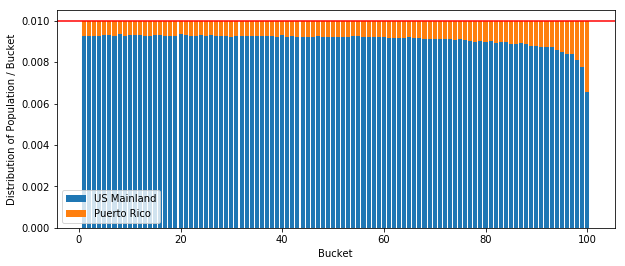

In [8]:
Distrn_Compare_2Color(df, 'score', df1, 'score', df2, 'score', 'US Mainland', 'Puerto Rico', 100)

#### Example 2: Base population contains more than target file1 and target file 2

In [13]:
df1 = pd.DataFrame(abs(np.random.randn(1000000)), columns = ['score'])
df1['region'] = df1['score'].map(lambda x: 'US Mainland')

df2 = pd.DataFrame(abs(1.2*np.random.randn(100000)+0.5), columns = ['score'])
df2['region'] = df2['score'].map(lambda x: 'Puerto Rico')

df3 = pd.DataFrame(abs(0.7*np.random.randn(200000)-0.5), columns = ['score'])
df3['region'] = df3['score'].map(lambda x: 'Hawaii')

df = df1.append(df2, ignore_index = True)
df = df.append(df3, ignore_index = True)

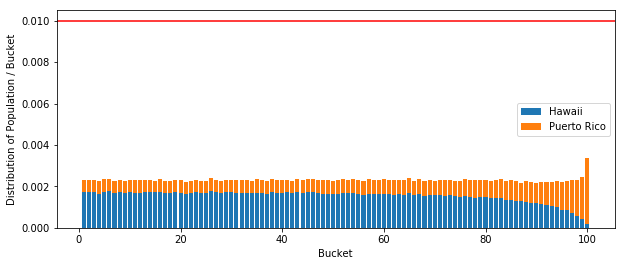

In [14]:
Distrn_Compare_2Color(df, 'score', df3, 'score', df2, 'score', 'Hawaii', 'Puerto Rico', 100)